In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression



In [21]:
df=pd.read_csv("https://raw.github.com/dsrscientist/dataset3/main/global_Power_plant_database.csv",error_bad_lines=False)

In [22]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
df.isna().count()

country                     908
country_long                908
name                        908
gppd_idnr                   908
capacity_mw                 908
latitude                    908
longitude                   908
primary_fuel                908
other_fuel1                 908
other_fuel2                 908
other_fuel3                 908
commissioning_year          908
owner                       908
source                      908
url                         908
geolocation_source          908
wepp_id                     908
year_of_capacity_data       908
generation_gwh_2013         908
generation_gwh_2014         908
generation_gwh_2015         908
generation_gwh_2016         908
generation_gwh_2017         908
generation_data_source      908
estimated_generation_gwh    908
dtype: int64

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [8]:
df.country.count()

908

In [14]:
df.duplicated().sum()

0

In [19]:
df.mode().count().sum()

1839

In [22]:
df.mean()

capacity_mw                  321.046378
latitude                      21.196189
longitude                     77.447848
other_fuel3                         NaN
commissioning_year          1996.876894
wepp_id                             NaN
year_of_capacity_data       2018.000000
generation_gwh_2013         2304.059202
generation_gwh_2014         2420.393316
generation_gwh_2015         2414.072373
generation_gwh_2016         2453.936292
generation_gwh_2017         2531.754458
estimated_generation_gwh            NaN
dtype: float64

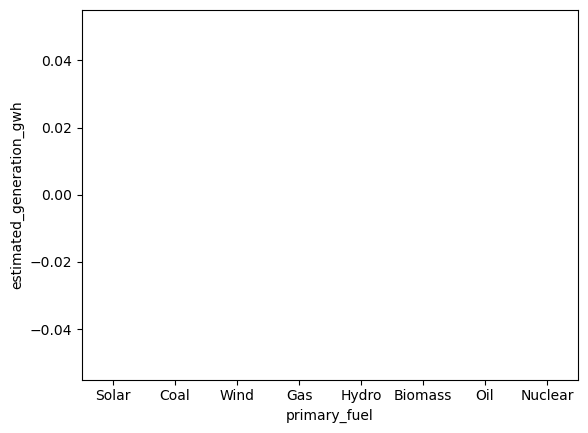

In [10]:
ax=sns.barplot(x='primary_fuel',y='estimated_generation_gwh',data=df)

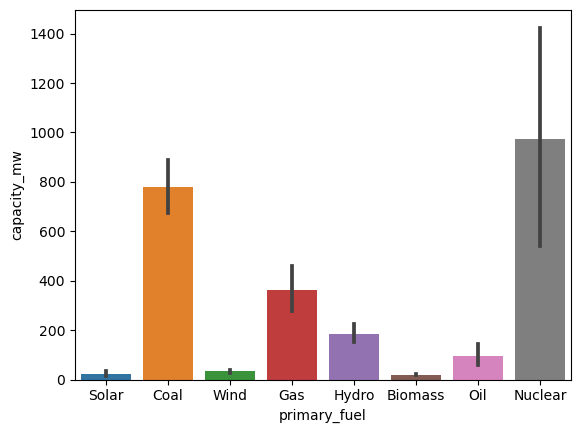

In [9]:
ax=sns.barplot(x='primary_fuel',y='capacity_mw',data=df)

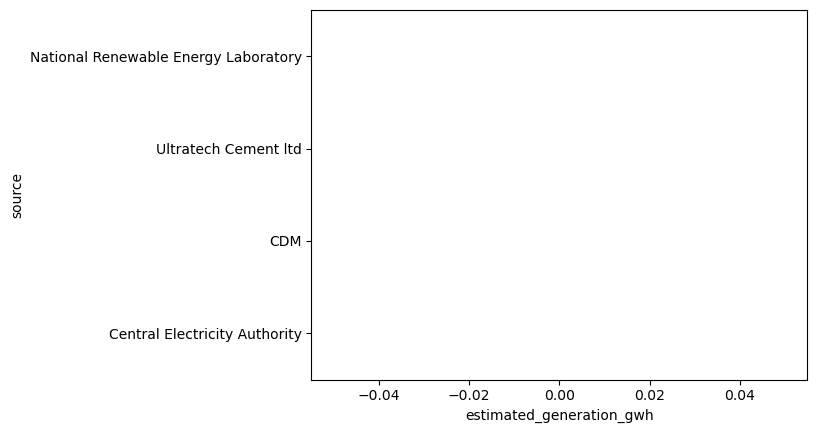

In [14]:
ax=sns.barplot(x='estimated_generation_gwh',y='source',data=df.head())

<Axes: >

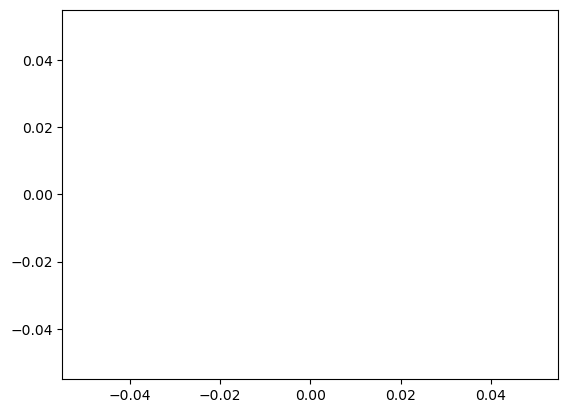

In [15]:
sns.scatterplot(x='commissioning_year',y='estimated_generation_gwh',data=df)

<Axes: >

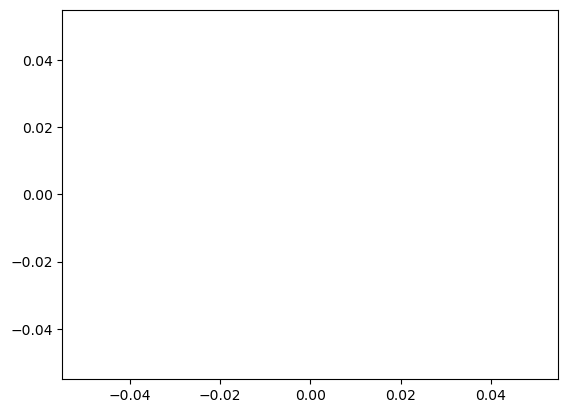

In [16]:
sns.scatterplot(x='capacity_mw',y='estimated_generation_gwh',data=df)

In [17]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
num_cols=['capacity_mw','latitude','longitude']
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())

In [21]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [22]:
categorical_col=['primary_fuel','other_fuel1']
df[categorical_col]=df[categorical_col].fillna(df[categorical_col].mode().iloc[0])

In [23]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [26]:
miss_cols = set(categorical_col) - set(df.columns)

In [27]:
miss_cols

set()

In [30]:
median_col=['commissioning_year','year_of_capacity_data']
df[median_col]=df[median_col].fillna(df[median_col].median())

In [31]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [32]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,908.000000,908.000000,0.0,908.000000,0.0,908.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1998.183921,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.088110,4.781201,NaN,13.085938,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,17.057825,74.390250,NaN,1997.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.278850,76.978950,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.183775,79.211600,NaN,2003.000000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [33]:
frequent_col=['owner','geolocation_source']
df[frequent_col]=df[frequent_col].fillna(df[frequent_col].mode().iloc[0])

In [34]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [35]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,908.000000,908.000000,0.0,908.000000,0.0,908.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1998.183921,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.088110,4.781201,NaN,13.085938,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,17.057825,74.390250,NaN,1997.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.278850,76.978950,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.183775,79.211600,NaN,2003.000000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [6]:
for year in range(2013,2017):
  year_col = f'generation_gwh_{year}'
  df.loc[df[year_col] < df['commissioning_year'], year_col] = np.nan

In [7]:
year_col

'generation_gwh_2016'

In [ ]:
df.drop(columns=['wepp_id','estimated_generation_gwh'],inplace=True)

In [11]:
df.drop(columns=['other_fuel2','other_fuel3'],inplace=True)

In [12]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,NaN,NaN,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,3035.55,5916.37,6243.0,5385.579736,Central Electricity Authority


In [15]:
from sklearn.impute import SimpleImputer

In [16]:
ness_cols = [f'generation_gwh_{year}' for  year in range(2013,2017)]
imputer_gen = SimpleImputer(strategy='constant', fill_value = 0 )
df[ness_cols] = imputer_gen.fit_transform(df[ness_cols])

In [72]:
df['generation_gwh_2017'].fillna(0,inplace=True)
df['generation_data_source'].fillna('N/A',inplace=True)

In [73]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

In [74]:
df.to_csv('df_cleaned_data.csv',index=False)


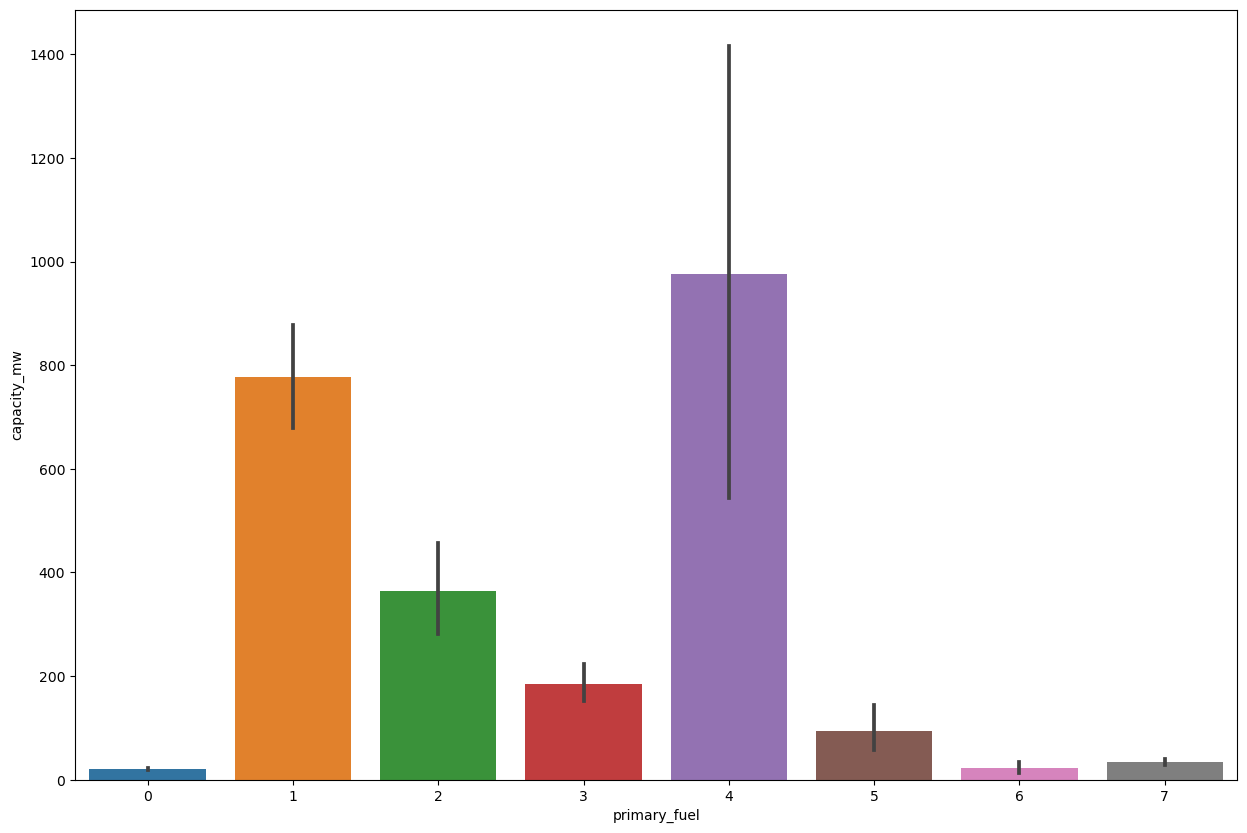

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'other_fuel3'}>],
       [<Axes: title={'center': 'commissioning_year'}>,
        <Axes: title={'center': 'wepp_id'}>,
        <Axes: title={'center': 'year_of_capacity_data'}>,
        <Axes: title={'center': 'generation_gwh_2013'}>],
       [<Axes: title={'center': 'generation_gwh_2014'}>,
        <Axes: title={'center': 'generation_gwh_2015'}>,
        <Axes: title={'center': 'generation_gwh_2016'}>,
        <Axes: title={'center': 'generation_gwh_2017'}>],
       [<Axes: title={'center': 'estimated_generation_gwh'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

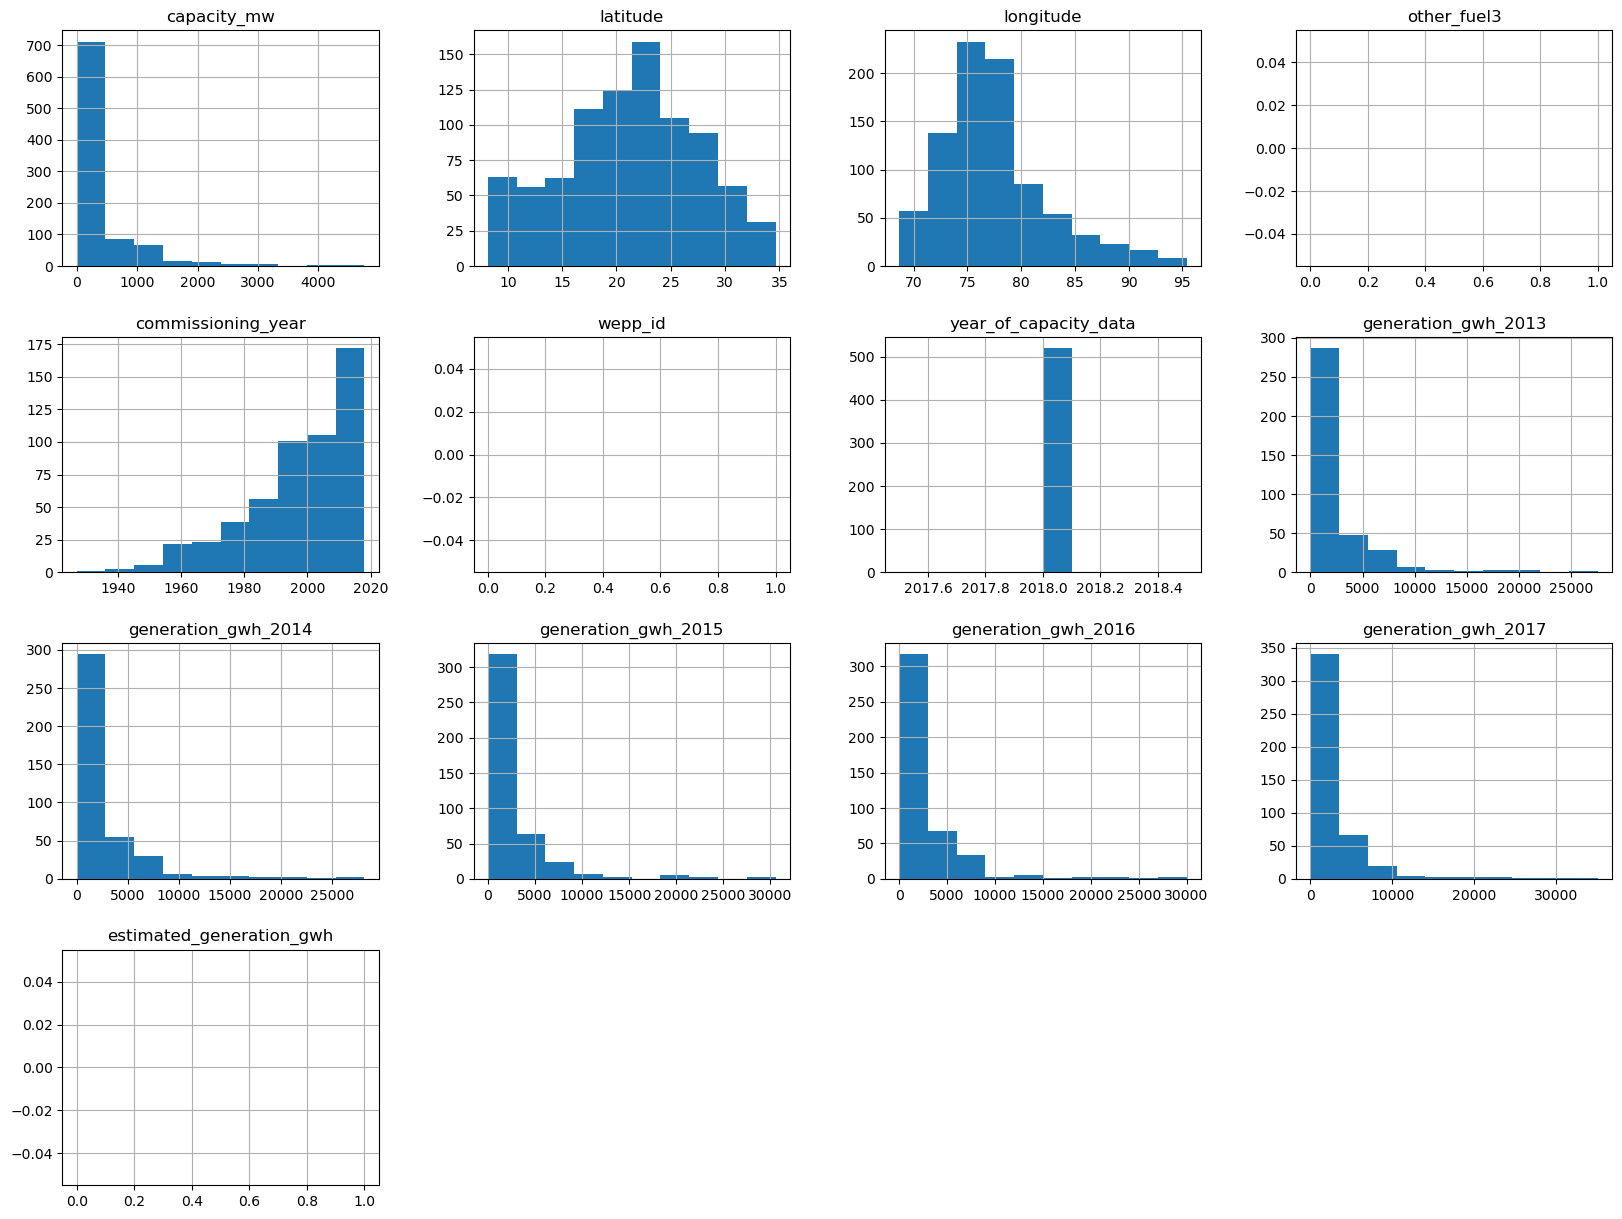

In [23]:
df.hist(figsize=(20,15))

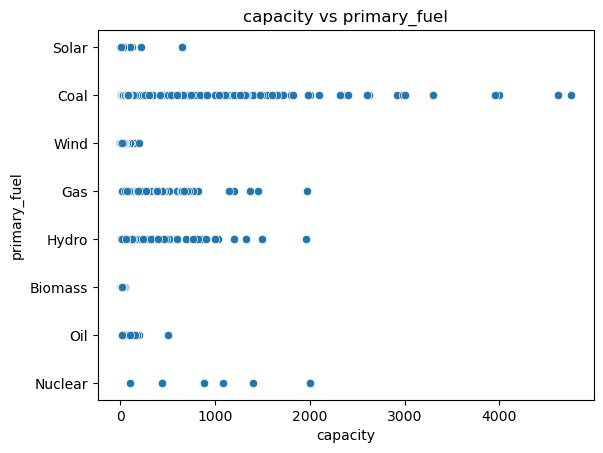

In [25]:
sns.scatterplot(x=df.capacity_mw,y=df.primary_fuel)
plt.title('capacity vs primary_fuel')
plt.xlabel('capacity')
plt.ylabel('primary_fuel')
plt.show()

In [76]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908.0,908.0,908.00000,908.00000,908.000000,862.000000,862.000000,908.000000,908.000000,0.0,...,908.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,908.000000,908.000000,0.0
mean,0.0,0.0,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,2.776432,NaN,...,1.754405,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,1235.206195,0.504405,NaN
std,0.0,0.0,262.26132,262.26132,580.221767,6.248627,4.907260,2.281339,0.429886,NaN,...,0.699844,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,3185.504866,0.500256,NaN
min,0.0,0.0,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,NaN,...,0.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.0,0.0,226.75000,226.75000,16.837500,16.771575,74.258975,1.000000,3.000000,NaN,...,2.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,0.000000,0.000000,NaN
50%,0.0,0.0,453.50000,453.50000,60.000000,21.778300,76.719250,3.000000,3.000000,NaN,...,2.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,0.000000,1.000000,NaN
75%,0.0,0.0,680.25000,680.25000,388.125000,25.516375,79.441475,6.000000,3.000000,NaN,...,2.000000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,708.134037,1.000000,NaN
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,3.000000,NaN,...,3.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

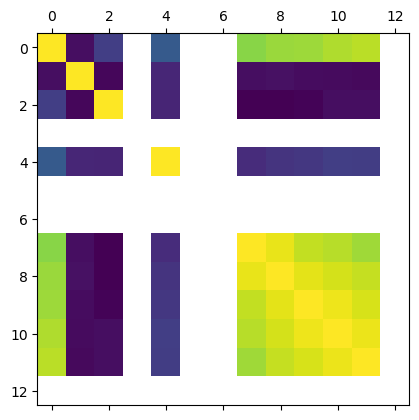

<Figure size 1000x800 with 0 Axes>

In [27]:
#correlation matrix

plt.matshow(df.corr())
plt.figure(figsize=(10,8))
plt.show


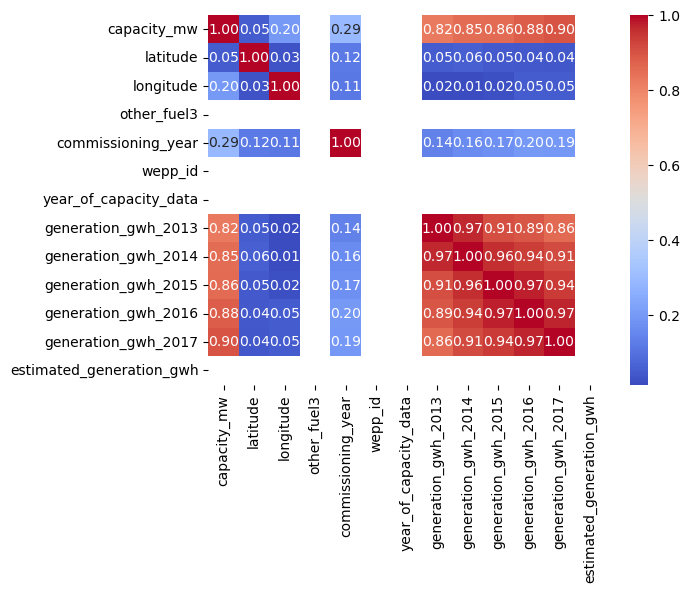

<Figure size 1000x800 with 0 Axes>

In [30]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.figure(figsize=(10,8))
plt.show()

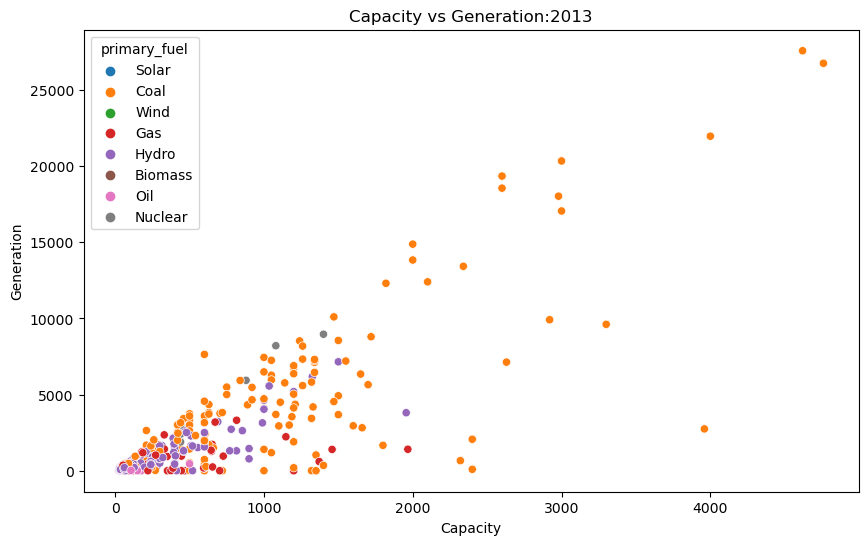

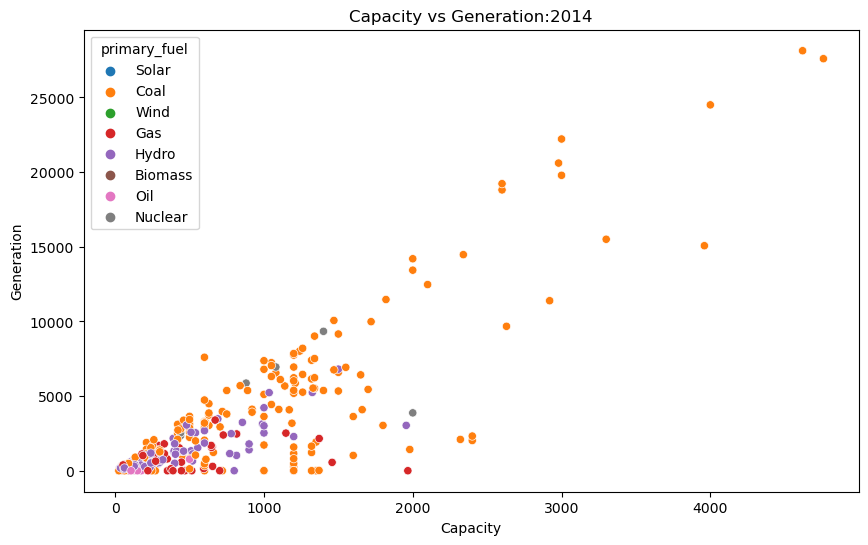

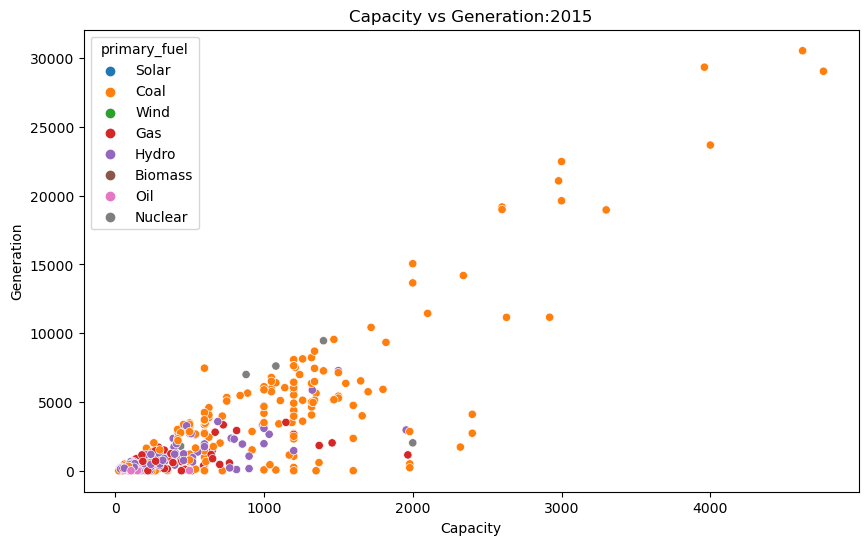

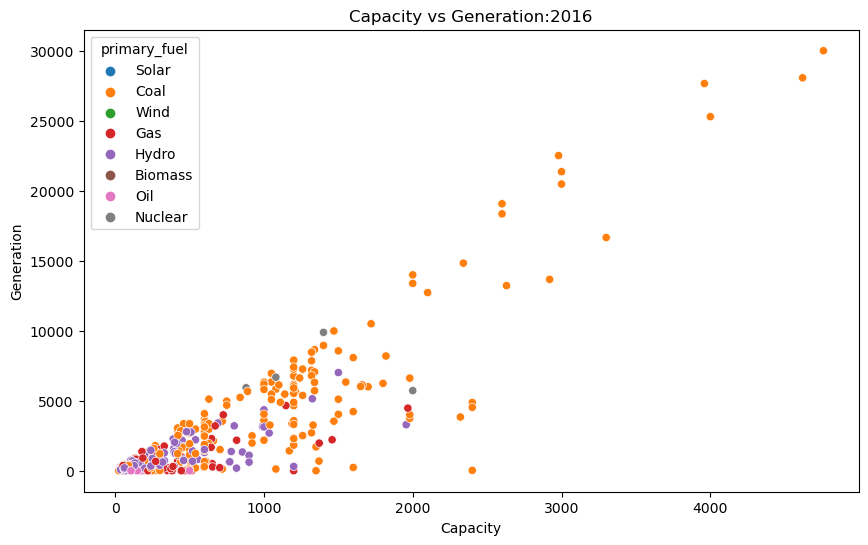

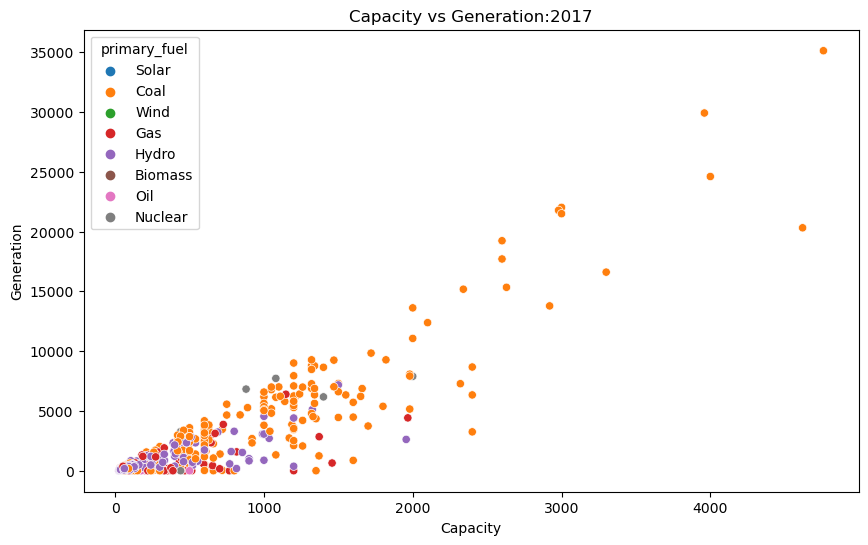

In [38]:
#capacity Vs generation analysis
years=range(2013,2018)

for year in years:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='capacity_mw',y=f'generation_gwh_{year}',data=df,hue ='primary_fuel')
  plt.title(f'Capacity vs Generation:{year}')
  plt.xlabel('Capacity')
  plt.ylabel('Generation')
  plt.show()

In [77]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,NaN,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,NaN,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,NaN,...,2,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN


In [78]:
le=LabelEncoder()
#one_hot_en = OneHotEncoder()

label_encoder_col = ['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','geolocation_source','generation_data_source','owner','source','url']
#one_hot_encode_col= ['geolocation_source','generation_data_source']



In [87]:
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [92]:
one_hot= pd.get_dummies(df['primary_fuel'], prefix='primary_fuel')
df_= pd.concat([df,one_hot], axis=1)
df.drop('primary_fuel',axis=1, inplace=True)

In [88]:
label_encode = {}

for col in label_encoder_col:
  df[col] = le.fit_transform(df[col])
  label_encode[col] =le

In [80]:
#df= pd.get_dummies(df, columns=one_hot_encode_col)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,NaN,...,2,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,NaN,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0,NaN


In [81]:
df['generation_gwh_2017']=pd.to_numeric(df['generation_gwh_2017'],errors='coerce')

In [89]:
df.dtypes

country                       int64
country_long                  int64
name                          int64
gppd_idnr                     int64
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                  int64
other_fuel1                   int64
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                         int64
source                        int64
url                           int64
geolocation_source            int64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source        int64
estimated_generation_gwh    float64
dtype: object

In [83]:
features=df.drop(['primary_fuel','capacity_mw'],axis=1)
goal_fuel=df['primary_fuel']
goal_capacity=df['capacity_mw']

In [90]:
X_train_fuel,X_test_fuel,y_train_fuel,y_test_fuel = train_test_split(features,goal_fuel,test_size=0.2,random_state=42)
X_train_capacity,X_test_capacity,y_train_capacity,y_test_capacity = train_test_split(features,goal_capacity,test_size=0.2,random_state=42)
     

In [93]:
scaler = StandardScaler()
X_train_fuel = scaler.fit_transform(X_train_fuel)
X_test_fuel = scaler.transform(X_test_fuel)
X_train_capacity = scaler.fit_transform(X_train_capacity)
X_test_capacity = scaler.transform(X_test_capacity)

ValueError: could not convert string to float: 'Oil'

In [58]:
classifiers = {
          'svc':SVC(),
          'rfc':RandomForestClassifier(),
          'knc':KNeighborsClassifier(),
          'gau':GaussianNB(),
          'dtc' : DecisionTreeClassifier(),
          'abc' : AdaBoostClassifier(),
          'grd':GradientBoostingClassifier(),
          'bagg':BaggingClassifier()
}

In [59]:
imputer = SimpleImputer(strategy='mean')

X_train_fuel = imputer.fit_transform(X_train_fuel)
X_test_fuel = imputer.transform(X_test_fuel)

for name, classifier in classifiers.items():
  classifier.fit(X_train_fuel,y_train_fuel)
  y_pred_fuel = classifier.predict(X_test_fuel)
  accuracy = accuracy_score(y_test_fuel,y_pred_fuel)
  print(f'{name} : {accuracy}')

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Oil'

In [65]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
models = [LinearRegression(),
          Ridge(alpha = 0.001),
          Lasso(alpha=0.003),
          SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          AdaBoostRegressor(base_estimator=LinearRegression())]

In [67]:
model_names = 'LinearRegression','Ridge','Lasso','SVR','SGDRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor','KNeighborsRegressor','BaggingRegressor'
model_df = pd.DataFrame(columns=['Model','MSE','R2','MeanCV'])
for model,model_names in zip(models,model_names):
  print(model)

  model.fit(X_train_capacity,y_train_capacity)
  pred = model.predict(X_test_capacity)
  mse = mean_squared_error(y_test_capacity,pred,squared=False)
  r2 = model.score(X_test_capacity,y_test_capacity)

  averages = cross_val_score(model,X_train_capacity,y_train_capacity,cv=5,scoring='neg_mean_squared_error').mean()

  model_df = pd.concat([model_df,pd.DataFrame({'Model': [model_names],'MSE':mse,'R2':r2,'MeanCV': [averages]})],ignore_index=True)
print(model_df)

LinearRegression()


ValueError: could not convert string to float: 'Oil'

In [68]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()

# define the perameter grid

Paramet_grid  = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}
grid_search = GridSearchCV(dtr,Paramet_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train_capacity,y_train_capacity)

ValueError: could not convert string to float: 'Oil'

In [69]:
best_dtr = DecisionTreeRegressor(max_depth=5,min_samples_leaf=2,min_samples_split=5)
best_dtr

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [70]:
best_dtr.fit(X_train_capacity,y_train_capacity)
y_pred_capacity = best_dtr.predict(X_test_capacity)
mse_capacity = mean_squared_error(y_test_capacity,y_pred_capacity,squared=False)
r2_capacity = best_dtr.score(X_test_capacity,y_test_capacity)
print(f'Decision Tree regression MSE: {mse_capacity},  Decision Tree regression R2: {r2_capacity}')
#print(r2_capacity)

ValueError: could not convert string to float: 'Oil'